In [1]:
%pylab inline
import pyclipper

Populating the interactive namespace from numpy and matplotlib


In [3]:
subj = (
    ((180, 200), (260, 200), (260, 150), (180, 150)),
    ((215, 160), (230, 190), (200, 190))
)
clip = ((190, 210), (240, 210), (240, 130), (190, 130))

pc = pyclipper.Pyclipper()
pc.AddPath(clip, pyclipper.PT_CLIP, True)
pc.AddPaths(subj, pyclipper.PT_SUBJECT, True)

solution = pc.Execute(pyclipper.CT_INTERSECTION, pyclipper.PFT_EVENODD, pyclipper.PFT_EVENODD)

[[[240, 200], [190, 200], [190, 150], [240, 150]],
 [[200, 190], [230, 190], [215, 160]]]

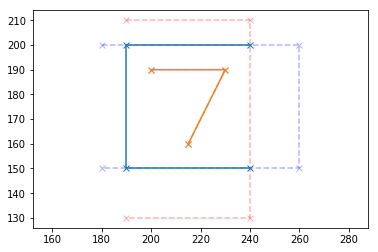

In [25]:
figure()
axis('equal')

c = np.asarray(clip)
xx, yy = c.T
plot(xx,yy,'x--r', alpha=0.3)

for path in (np.asarray(_) for _ in subj):
    xx, yy = path.T
    plot(xx,yy,'x--b', alpha=0.3)

for path in (np.asarray(_) for _ in solution):
    xx = path[:,0]
    yy = path[:,1]
    plot(xx,yy,'x-')

In [14]:
np.asarray(solution[0])[:,0]

array([240, 190, 190, 240])